In [1]:
import keras
print(keras.__version__)

2.9.0


In [2]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)
train_data.shape
train_data[0]
train_labels[0]

17464789/17464789 [==============================] - 0s 0us/step


1

In [3]:
train_data.shape


(25000,)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
word_index = imdb.get_word_index()
word_index.items()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
# there is (key,vale)in the item(()), thus the (key,value) is brought for 
#item(()), then is given to dict[value, key], in the reverse order 

1641221/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review #0,1,2 is special character thus do not need to see>> i-3
#'?'>>> replace the 0,1,2 to the '?' sign

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
type(reverse_word_index)

dict

In [9]:
#Data preparation 

import numpy as np

def vectorise_sequence(sequences, dimension=10000): #demension=10000>> default value
  results=np.zeros((len(sequences),dimension))
  return results

vectorise_sequence(train_data)  

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
for c in enumerate(['A','B','C']): #enumerate assigns index number within the []
  print(c)

(0, 'A')
(1, 'B')
(2, 'C')


In [11]:
#compare this with 

for c in (['A','B','C']): #enumerate assigns index number within the []
  print(c)

A
B
C


In [12]:
for i,c in enumerate(['A','B','C']): #assigns the index and the element
  print(i,c)

0 A
1 B
2 C


In [13]:
for i,c in enumerate(['A','B','C'], start=1): #can assign starting point
  print(i,c)

1 A
2 B
3 C


In [14]:
temp=enumerate(['A','B','C'])
type(temp)

enumerate

In [15]:
temp=enumerate(['A','B','C'])
next(temp)
next(temp)
next(temp)     

(2, 'C')

In [16]:

def vectorise_sequence(sequences, dimension=10000): #demension=10000>> default value
  results=np.zeros((len(sequences),dimension))
  
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1

  return results

x_train=vectorise_sequence(train_data)  
x_test=vectorise_sequence(test_data)

In [17]:
print(x_train[0]) #0>> there is no words 

[0. 1. 1. ... 0. 0. 0.]


In [18]:
#changing to a float type

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(train_labels).astype('float32')

In [19]:
#artifical neural network

from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid')) # outputlayer

In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
x_val=x_train[:10000] #slicing the data 
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [22]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 4s 44ms/step - loss: 0.4979 - accuracy: 0.7845 - val_loss: 0.3713 - val_accuracy: 0.8720
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2926 - accuracy: 0.9055 - val_loss: 0.2981 - val_accuracy: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2186 - accuracy: 0.9251 - val_loss: 0.2754 - val_accuracy: 0.8911
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1718 - accuracy: 0.9437 - val_loss: 0.2816 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1425 - accuracy: 0.9544 - val_loss: 0.2821 - val_accuracy: 0.8906
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1177 - accuracy: 0.9629 - val_loss: 0.2969 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0966 - accuracy: 0.9704 - val_loss: 0.3204 - val_accuracy: 0.8791
Epoch 8/20
30

In [23]:
acc=history.history['accuracy']
acc

[0.7845333218574524,
 0.9055333137512207,
 0.9250666499137878,
 0.9436666369438171,
 0.9544000029563904,
 0.962933361530304,
 0.9703999757766724,
 0.9758666753768921,
 0.9804666638374329,
 0.9846000075340271,
 0.9906666874885559,
 0.9914666414260864,
 0.9926666617393494,
 0.9956666827201843,
 0.9959333539009094,
 0.996999979019165,
 0.9987999796867371,
 0.9972000122070312,
 0.9995333552360535,
 0.9991999864578247]

In [24]:
# result/data of the experiment 

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

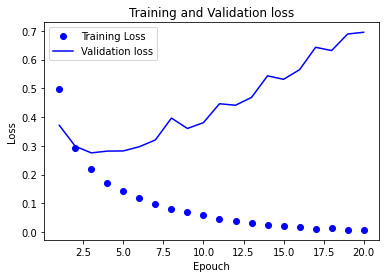

In [25]:
#visualising the result of the experiment

import matplotlib.pyplot as plt 

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b-',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epouch')
plt.ylabel('Loss')
plt.legend()

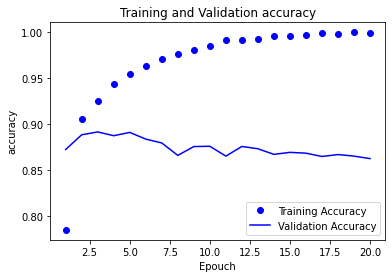

In [26]:
plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b-',label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epouch')
plt.ylabel('accuracy')
plt.legend()

In [27]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid')) # outputlayer

from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=3,
                  batch_size=256,
                  validation_data=(x_val,y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/3
59/59 [==============================] - 2s 20ms/step - loss: 0.4205 - accuracy: 0.8247 - val_loss: 0.3021 - val_accuracy: 0.8850
Epoch 2/3
59/59 [==============================] - 1s 13ms/step - loss: 0.2312 - accuracy: 0.9171 - val_loss: 0.2866 - val_accuracy: 0.8851
Epoch 3/3
59/59 [==============================] - 1s 12ms/step - loss: 0.1692 - accuracy: 0.9402 - val_loss: 0.3125 - val_accuracy: 0.8782
